In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv("/content/sample_data/creditcard.csv")
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

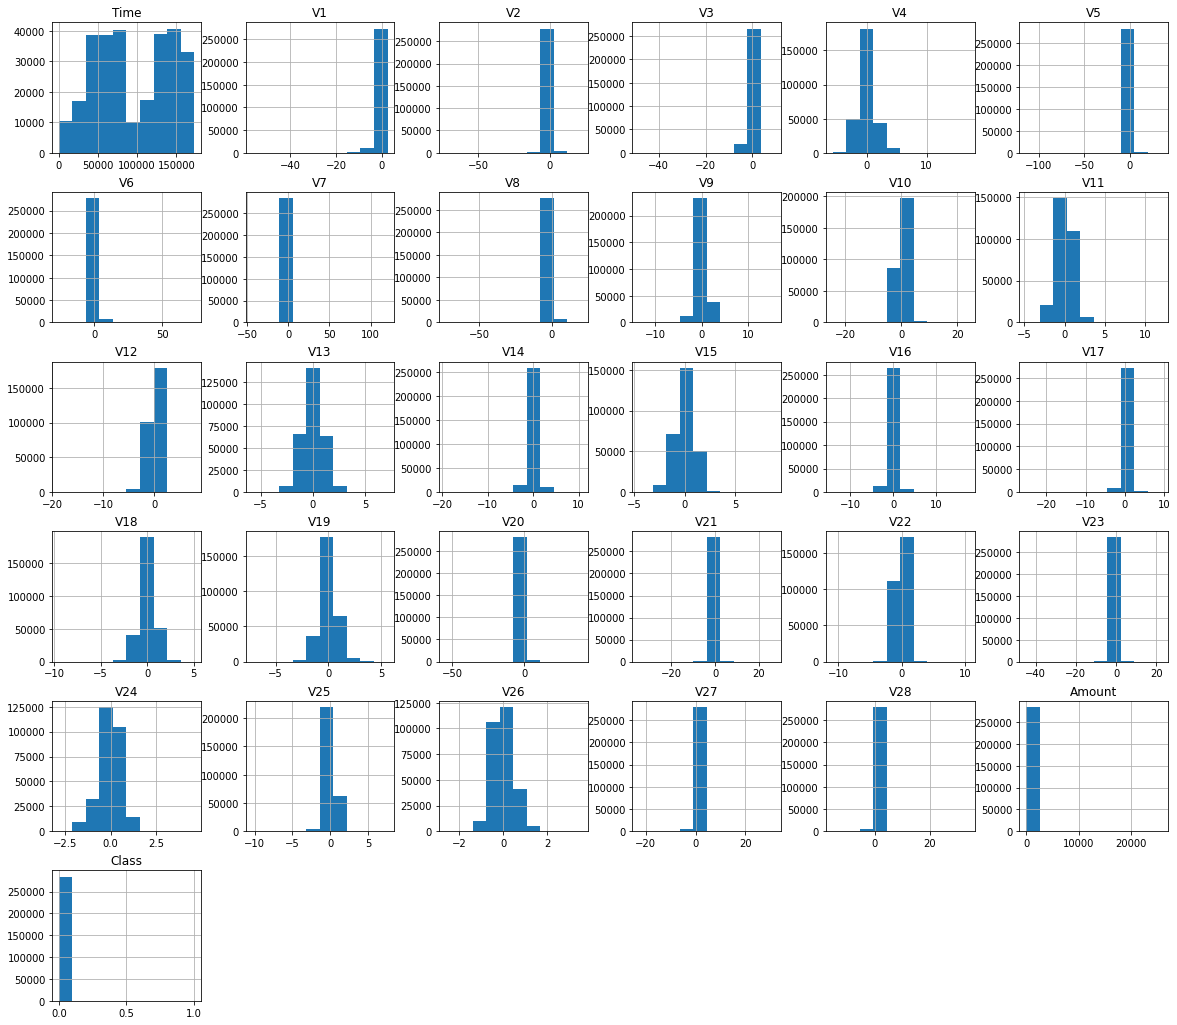

In [ ]:
data.hist(figsize=(20, 18))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


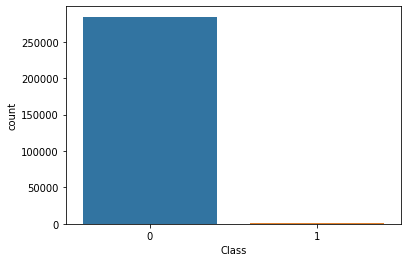

In [ ]:
sns.countplot('Class', data=data)
plt.show()

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.info()

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
fraud = data[data.Class == 1]
benign = data[data.Class == 0]
print("fraud: ", fraud.shape)
print("benign:", benign.shape)

fraud:  (492, 31)
benign: (284315, 31)


In [ ]:
std_scaler = StandardScaler()
transformed = std_scaler.fit_transform(data[['Amount', 'Time']].values)
data[['Amount', 'Time']] = transformed

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
data.describe()

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']
print(X.shape, y.shape)

(284807, 30) (284807,)


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)

(182276, 30) (45569, 30) (56962, 30)


In [ ]:
weight_for_neg = 1 / data['Class'].value_counts()[0] * (data.shape[0] / 2.0)
weight_for_pos = 1 / data['Class'].value_counts()[1] * (data.shape[0] / 2.0)
class_weight = {0: weight_for_neg, 1:weight_for_pos}
class_weight

{0: 0.5008652375006595, 1: 289.43800813008136}

In [ ]:
weight_for_neg = data['Class'].value_counts()[1] / data.shape[0] 
weight_for_pos = data['Class'].value_counts()[0] / data.shape[0]
class_weight = {0: weight_for_neg, 1:weight_for_pos}
class_weight

{0: 0.001727485630620034, 1: 0.9982725143693799}

In [ ]:
input_dim = X_train.shape[-1]
dropoout_rate = 0.30

model = keras.Sequential(
    [
     keras.layers.Dense(256, activation='relu', input_dim=input_dim, kernel_regularizer=keras.regularizers.l2(0.01)),
     keras.layers.BatchNormalization(),
     keras.layers.Dropout(dropoout_rate),
     keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
     keras.layers.BatchNormalization(),
     keras.layers.Dropout(dropoout_rate),
     keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
     keras.layers.BatchNormalization(),
     keras.layers.Dropout(dropoout_rate),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               7936      
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_7 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_16 (Dropout)        (None, 256)              

In [ ]:
learning_rate = 1e-4
METRICS = [
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='AUCPR', curve="PR")
]

model.compile(optimizer=keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=METRICS)

In [ ]:
callbacks = [keras.callbacks.EarlyStopping(monitor='loss', patience=3)]

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=2048, epochs=100, class_weight=class_weight)

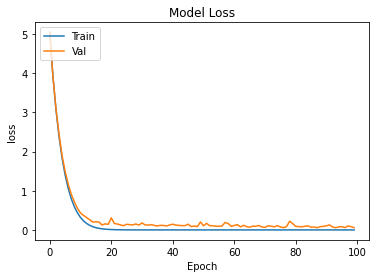

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
scors = model.evaluate(X_test, y_test, batch_size=2048)

28/28 [==============================] - 1s 25ms/step - loss: 0.0066 - fn: 31.0000 - fp: 9.0000 - tn: 56855.0000 - tp: 67.0000 - precision: 0.8816 - recall: 0.6837 - AUCPR: 0.8337


In [ ]:
scors = model.evaluate(X_test, y_test, batch_size=2048)

28/28 [==============================] - 1s 29ms/step - loss: 0.4898 - fn: 8.0000 - fp: 585.0000 - tn: 56279.0000 - tp: 90.0000 - precision: 0.1333 - recall: 0.9184 - AUCPR: 0.5881


In [ ]:
scors = model.evaluate(X_test, y_test, batch_size=2048)

28/28 [==============================] - 1s 18ms/step - loss: 0.0604 - fn: 7.0000 - fp: 759.0000 - tn: 56105.0000 - tp: 91.0000 - precision: 0.1071 - recall: 0.9286 - AUCPR: 0.7374


RF:

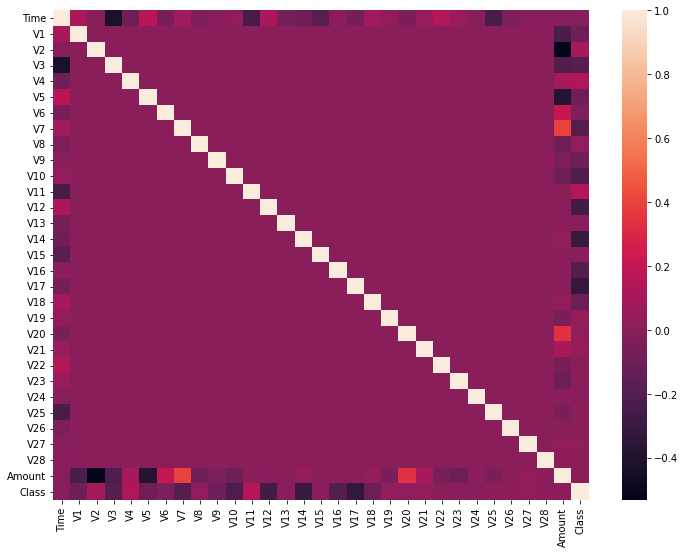

In [ ]:
corr_mat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corr_mat)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_val)

In [ ]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, confusion_matrix

prec = precision_score(y_val, y_pred)
print("precision: {}".format(prec))

recall = recall_score(y_val, y_pred)
print("recall: {}".format(recall))

pr_crv = precision_recall_curve(y_val, y_pred)
print("pr_crv: {}".format(pr_crv))


precision: 0.9795918367346939
recall: 0.75
pr_crv: (array([0.00140446, 0.97959184, 1.        ]), array([1.  , 0.75, 0.  ]), array([0, 1]))


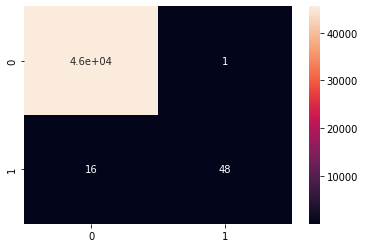

In [ ]:
conf_mat = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_mat, annot = True)
plt.show()